# Built With Forge Jupyter

## Instructions

This Jupyter Notebook parses a local CSV file named "bwf.csv" that contains a dump from the Built with Forge Heatmap.  This assumes that there are no headers in the file and that some of the superflous items are removed.  The following Order is assumed for the columns in the CSV file.

1. "Service Name"
2. "Product Family"
3. "Observability/ Supportability"
4. "Quality"
5. "Cost Efficiency"
6. "Compliance/ Privacy"
7. "Reliability/ Availability"
8. "Build/ Release"
9. "Security"
10. "Scalability/ Performance"
11. "Common Architecture"
12. "Bronze Total"

Finally - ensure that the values for the percentages are stored as numbers in the CSV and do not contain the "%" sign.  You might need to pre-process the data slightly for this purpose.

### List the Contents of the Directory

Make sure the bwf.csv file is present.  (Also this is here to show the "!" in front of a standard shell command.)

In [1]:
!ls

Amazon-SageMaker-high-level-Python-library.ipynb
My First Notebook.ipynb
Pandas-Demo.ipynb
README.md
UCSanDiegoX
UNIX
Udemy - Python and Pandas
bwf.csv
bwf.ipynb
database.sqlite
donuts.csv
ex-application.zip
ex-driver.zip
kmeans_mnist.ipynb
training.csv


### Load Matplotlib as well as Pandas

Utilities used for visualization and file parsing

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
bwf = pd.read_csv("bwf.csv", names=["SVCS","FAM","MON", "QA", "COST", "COMP", "REL", "CICD", "SEC", "PERF", "ARCH","TOTAL"])

### Display the File

The head command will load the first five rows of the spreadsheet

In [4]:
bwf.head()

,SVCS,FAM,MON,QA,COST,COMP,REL,CICD,SEC,PERF,ARCH,TOTAL
0,ABus,MCP-Cloud Platform,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,ACE,MCP-Cloud Platform,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,ACM,MCP-Cloud Platform,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Activity,MCP-Cloud Platform,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,BIM 360 Locations,MCP-Construction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Display Some Visulazations about the Data

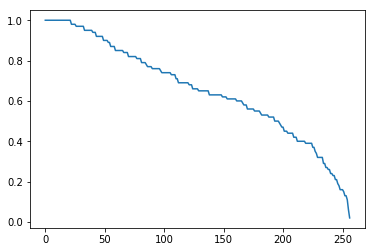

In [5]:
bwf.TOTAL.plot()

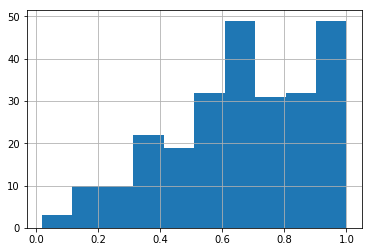

In [6]:
bwf.TOTAL.hist()

## Heatmap Trial

https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

In [7]:
bwfheatmap = bwf.drop(columns=['SVCS','FAM'])

In [8]:
# bwfheatmap.set_index('SVCS').head()

In [17]:
bwfheatmap = bwfheatmap[-30:]

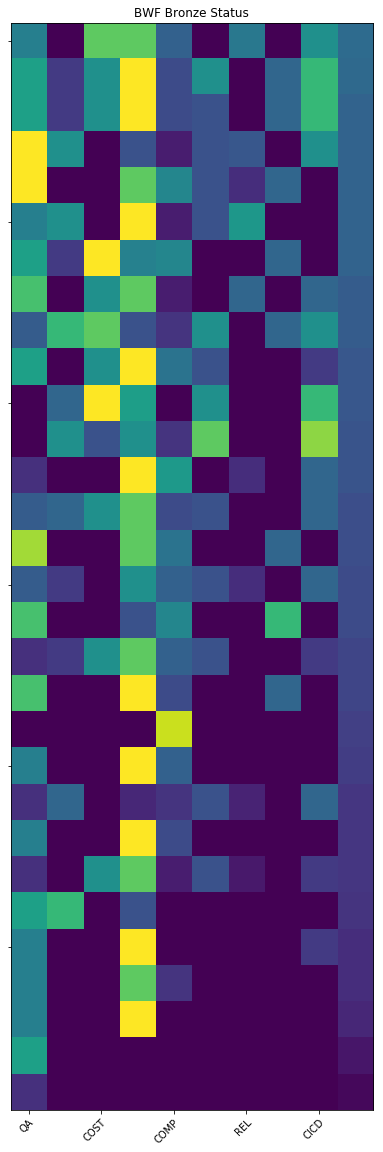

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(bwfheatmap)

# ... and label them with the respective list entries
ax.set_xticklabels(["MON", "QA", "COST", "COMP", "REL", "CICD", "SEC", "PERF", "ARCH","TOTAL"])
ax.set_yticklabels('')



# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("BWF Bronze Status")
plt.show()

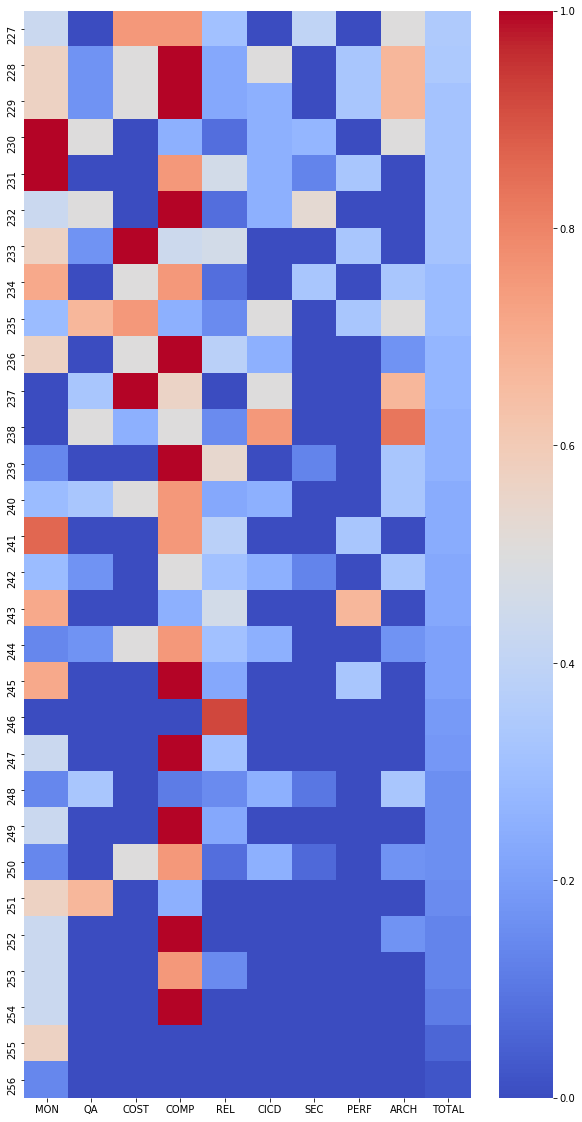

In [21]:
import seaborn as sns

plt.figure(figsize=(10,20))
sns.heatmap(bwfheatmap, cmap="coolwarm")